# PRACTICA NLP ROBERTO MARTINEZ CAMACHO

# Ejercicio 1 - Topic Modeling

Imports y librerias

In [1]:
import sys
import json
import pandas as pd
from collections import Counter
import string
import os
import random
import re

import spacy

import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt

from wordcloud import WordCloud

pd.options.mode.chained_assignment = None  # default='warn'
sys.path.append('../..')

# Lectura de datos

In [2]:
reviews_dict_baby = []
for line in open('../../Práctica Final/Baby_5.json', 'r'):
    reviews_dict_baby.append(json.loads(line))

# Analisis exploratorio

In [3]:
type(reviews_dict_baby)

list

In [4]:
print(len(reviews_dict_baby))

160792


In [5]:
reviews_dict_baby

[{'reviewerID': 'A1HK2FQW6KXQB2',
  'asin': '097293751X',
  'reviewerName': 'Amanda Johnsen "Amanda E. Johnsen"',
  'helpful': [0, 0],
  'reviewText': "Perfect for new parents. We were able to keep track of baby's feeding, sleep and diaper change schedule for the first two and a half months of her life. Made life easier when the doctor would ask questions about habits because we had it all right there!",
  'overall': 5.0,
  'summary': 'Awesine',
  'unixReviewTime': 1373932800,
  'reviewTime': '07 16, 2013'},
 {'reviewerID': 'A19K65VY14D13R',
  'asin': '097293751X',
  'reviewerName': 'angela',
  'helpful': [0, 0],
  'reviewText': 'This book is such a life saver.  It has been so helpful to be able to go back to track trends, answer pediatrician questions, or communicate with each other when you are up at different times of the night with a newborn.  I think it is one of those things that everyone should be required to have before they leave the hospital.  We went through all the pages of

In [6]:
reviews_dict_baby[100]

{'reviewerID': 'A3WI3857X5T1O',
 'asin': 'B00002JV9S',
 'reviewerName': 'JC',
 'helpful': [0, 0],
 'reviewText': 'This toy was our go-to when my daughter was teething.  It really soothed her and calmed her down.  When her two year molars started coming in we got it back out for her and she still loved it.  We will definitely be buying another one for our next baby!',
 'overall': 5.0,
 'summary': 'Great teether!',
 'unixReviewTime': 1387065600,
 'reviewTime': '12 15, 2013'}

Cargamos y analizamos el resto de datasets.

In [7]:
df_baby = pd.DataFrame(reviews_dict_baby)

In [8]:
df_baby.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5.0,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5.0,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5.0,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5.0,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4.0,Great,1396310400,"04 1, 2014"


In [9]:
reviews_dict_phones = []
for line in open('../../Práctica Final/Cell_Phones_and_Accessories_5.json', 'r'):
    reviews_dict_phones.append(json.loads(line))
    
print(len(reviews_dict_phones))

df_phones = pd.DataFrame(reviews_dict_phones)
df_phones.head()

194439


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [10]:
reviews_dict_music = []
for line in open('../../Práctica Final/Digital_Music_5.json', 'r'):
    reviews_dict_music.append(json.loads(line))
    
print(len(reviews_dict_music))

df_music = pd.DataFrame(reviews_dict_music)
df_music.head()

64706


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,1200528000,"01 17, 2008"


In [11]:
reviews_dict_toys = []
for line in open('../../Práctica Final/Toys_and_Games_5.json', 'r'):
    reviews_dict_toys.append(json.loads(line))
    
print(len(reviews_dict_toys))

df_toys = pd.DataFrame(reviews_dict_toys)
df_toys.head()

167597


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5.0,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4.0,it works pretty good for moving to different a...,1395964800,"03 28, 2014"
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",Both sides are magnetic. A real plus when you...,5.0,love this!,1359331200,"01 28, 2013"
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",Bought one a few years ago for my daughter and...,5.0,Daughters love it,1391817600,"02 8, 2014"
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",I have a stainless steel refrigerator therefor...,4.0,Great to have so he can play with his alphabet...,1399248000,"05 5, 2014"


In [12]:
reviews_dict_games = []
for line in open('../../Práctica Final/Video_Games_5.json', 'r'):
    reviews_dict_games.append(json.loads(line))
    
print(len(reviews_dict_games))

df_games = pd.DataFrame(reviews_dict_games)
df_games.head()

231780


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011"


Hemos cargado los 5 datasets que vamos a utilizar (reviews de bebes, musica, telefonos, juguetes y videojuegos) y comprobamos que todos cuentan con las mismas columnas, vamos a realizar un drop() de aquellas que no aportan informacion para el topic modeling.

In [13]:
#df_baby
#df_music
#df_phones
#df_toys
#df_games

In [14]:
df_baby.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [15]:
cols_to_drop = ['reviewerID', 'asin', 'reviewerName', 'helpful', 'summary', 'unixReviewTime', 'reviewTime']

In [16]:
df_baby = df_baby.drop(cols_to_drop, axis=1)
df_music = df_music.drop(cols_to_drop, axis=1)
df_phones = df_phones.drop(cols_to_drop, axis=1)
df_toys = df_toys.drop(cols_to_drop, axis=1)
df_games = df_games.drop(cols_to_drop, axis=1)

In [17]:
df_baby.isna().sum()

reviewText    0
overall       0
dtype: int64

In [18]:
df_music.isna().sum()

reviewText    0
overall       0
dtype: int64

In [19]:
df_phones.isna().sum()

reviewText    0
overall       0
dtype: int64

In [20]:
df_toys.isna().sum()

reviewText    0
overall       0
dtype: int64

In [21]:
df_games.isna().sum()

reviewText    0
overall       0
dtype: int64

Compruebo que no existen valores nulos o nan en ninguno de los campos de los datasets

Seleccionamos un subconjunto de los registros para poder trabajar con ellos.

In [22]:
#df_baby_sub = df_baby[:10000]
#df_music_sub = df_music[:10000]
#df_phones_sub = df_phones[:10000]
#df_toys_sub = df_toys[:10000]
#df_games_sub = df_games[:10000]

In [23]:
df_baby_sub = df_baby[:5000]
df_music_sub = df_music[:5000]
df_phones_sub = df_phones[:5000]
df_toys_sub = df_toys[:5000]
df_games_sub = df_games[:5000]

In [24]:
df_games_sub.describe()

,overall
count,5000.000000
mean,4.304200
std,1.072703
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [25]:
df_baby_sub['origin'] = 'baby'
df_music_sub['origin'] = 'music'
df_phones_sub['origin'] = 'phones'
df_toys_sub['origin'] = 'toys'
df_games_sub['origin'] = 'games'

Voy a incluir una columna para saber el dataset original del que procede cada registro antes de unificar los 5 subconjuntos de datasets en uno solo.

In [26]:
df_games_sub.tail()

,reviewText,overall,origin
4995,I just got a hankering to re-install this game...,5.0,games
4996,"Where to start...well, I know I won't make a c...",5.0,games
4997,"Take 'Conflict: Freespace', polish up the alre...",4.0,games
4998,Freespace 2 has a lot going for it. It's a mod...,3.0,games
4999,"When I first got this game, I didn't know what...",5.0,games


In [27]:
df = pd.concat([df_baby_sub, df_music_sub, df_phones_sub, df_toys_sub, df_games_sub], join='inner', ignore_index = True)
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df

(25000, 3)


,reviewText,overall,origin
0,"A modern classic, this is an finely-honed firs...",5.0,games
1,I have loved and listened to this CD since I w...,5.0,music
2,I bought this bluetooth after using another mo...,1.0,phones
3,"For fans, another score, one of his best, prob...",3.0,music
4,This thing is really great! I work in a metal...,5.0,phones
...,...,...,...
24995,I gave this 5 stars because this IS a truly cl...,5.0,toys
24996,"Always a fun game, I like Monopoly and the kid...",4.0,toys
24997,I used this stylus for a couple months and rea...,3.0,phones
24998,While the game may be outdated and not as fun ...,4.0,games


# Preprocesado

Probamos con pocos registros y vamos aumentando en funcion de lo conseguido

In [28]:
df = df[['reviewText']]

In [29]:
#df = df[:5000]

In [30]:
df

,reviewText
0,"A modern classic, this is an finely-honed firs..."
1,I have loved and listened to this CD since I w...
2,I bought this bluetooth after using another mo...
3,"For fans, another score, one of his best, prob..."
4,This thing is really great! I work in a metal...
...,...
24995,I gave this 5 stars because this IS a truly cl...
24996,"Always a fun game, I like Monopoly and the kid..."
24997,I used this stylus for a couple months and rea...
24998,While the game may be outdated and not as fun ...


Como bien se nos explico en clase en referentes a las stopwords, podemos definir como aqui una lista personalizada para tener ciertas palabras que queremos excluir de nuestro dataset.

In [31]:
#black_list = []
black_list = ['no', 'os', 'a', 'off', 'and', 'the','it', 'to', 'd', 'et', 'il', 'that', 'as', 'for', 'it',
              'elections', 'would',  'this',  'with']

Se define una funcion / pipeline para limpiar el texto de caracteres con tilde, digitos, caracteres alfanumericos y sustituri por --> ""

In [32]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',
                '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

Se define una funcion para lematizar y quedarnos solamente con los sustantivos o adjetivos. (los mejores resultados que no varian mucho los he conseguido con estos 2 parametros)

In [33]:
def lemmatization(texts, allowed_postags=['NOUN']):
    texts_out = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in black_list and len(token.text)>2]
    return texts_out

Convertimos el dataframe a una lista para poder usar gensim y asi encontrar bigramas que puedan mejorar el modelo.

In [34]:
len(df.reviewText.to_list())

25000

In [35]:
#%%time #con este parametro controlo el tiempo de ejecucion para ir probando con mas registros.
bigram = gensim.models.Phrases(df.reviewText.to_list())

In [36]:
bigram[df.reviewText.to_list()[2000].split()]

['Love',
 'these!',
 'They',
 'are',
 'easy',
 'to',
 'install',
 'and',
 'give',
 'me',
 'so',
 'much',
 'more',
 'peace',
 'of',
 'mind',
 'knowing',
 'that',
 'if',
 'my',
 'kiddo',
 'were',
 'to',
 'climb',
 'up',
 'the',
 'bookcase',
 'or',
 'his',
 'dresser-',
 'they',
 'are',
 'secured',
 'to',
 'the',
 'wall',
 'and',
 "couldn't",
 'fall',
 'and',
 'crush',
 'him.']

Con spacy vamos a lematizar nuestro corpus.

In [37]:
stop = set(stopwords.words('english'))

additional_stopwords=set(black_list)

stopwords = stop.union(additional_stopwords)

In [38]:
#python -m spacy download en
nlp = spacy.load('en')

In [39]:
df.reviewText[10]

"This is a masterpiece. I won't get into the Sgt. Peppers or Rubber Soul vs. Pet Sounds. I let this classic stand on its own. Brian Wilson stretched his wings on this one and the band followed. It is, at times, a little  uneven, but the music stands up. &quot;Wouldn't it be Nice&quot; and  &quot;God Only Knows&quot; are the deserved hits, but don't push aside the  other not-so-popular titles like &quot;I Just Wasn't Made for These  Times,&quot; &quot;I Know There's an Answer&quot; and probably the most  underrated Beach Boys song of all time, &quot;Caroline No.&quot; A truly  introspective album. It's deserving of the classic label. Truly a fantastic  album. The Beach Boys showed they could do more than just surf and drag."

In [40]:
cleaner(df.reviewText[10])

['sgt',
 'peppers',
 'rubber',
 'soul',
 'sounds',
 'wings',
 'band',
 'times',
 'music',
 'quot',
 'hits',
 'titles',
 'quot',
 'times',
 'quot',
 'answer',
 'quot',
 'beach',
 'boys',
 'time',
 'album',
 'label',
 'beach',
 'boys',
 'drag']

Guardamos en otra columna el texto original de la review.

In [41]:
df['text2'] = df['reviewText']

In [42]:
df

,reviewText,text2
0,"A modern classic, this is an finely-honed firs...","A modern classic, this is an finely-honed firs..."
1,I have loved and listened to this CD since I w...,I have loved and listened to this CD since I w...
2,I bought this bluetooth after using another mo...,I bought this bluetooth after using another mo...
3,"For fans, another score, one of his best, prob...","For fans, another score, one of his best, prob..."
4,This thing is really great! I work in a metal...,This thing is really great! I work in a metal...
...,...,...
24995,I gave this 5 stars because this IS a truly cl...,I gave this 5 stars because this IS a truly cl...
24996,"Always a fun game, I like Monopoly and the kid...","Always a fun game, I like Monopoly and the kid..."
24997,I used this stylus for a couple months and rea...,I used this stylus for a couple months and rea...
24998,While the game may be outdated and not as fun ...,While the game may be outdated and not as fun ...


Procedemos a limpiar el texto de toda la columna de reviewText con la funcion "cleaner".

In [43]:
%%time
df['reviewText'] = df['reviewText'].apply(cleaner)

Wall time: 6min 6s


In [44]:
dictionary = Dictionary(df['reviewText'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df['reviewText'].to_list()]

# MODELOS

Primero comparamos con un modelo Hierarchical Dirichlet Process, que en estadistica se trata de un algoritmo no parametrico bayesiano con un enfoque para la agrupacion de datos agrupados.

Es un algoritmo que segun he leido no era necesario incluir el numero de topics y parece interesante para empezar.

In [45]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary, random_state= 30)

C:\Users\Rober\anaconda3\lib\site-packages\gensim\models\hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


In [46]:
def display_topics(model, model_type="lda"):
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [47]:
display_topics(hdpmodel, model_type="hdp")

Topic 0:
game  games  time  play  graphics  fun  characters  way  people  story 

Topic 1:
album  song  songs  quot  music  time  albums  love  track  rock 

Topic 2:
phone  time  baby  game  bottles  use  bottle  battery  product  case 

Topic 3:
game  phone  time  games  use  battery  card  play  cards  way 

Topic 4:
album  song  songs  quot  music  time  love  track  albums  game 

Topic 5:
game  time  games  fun  play  graphics  way  music  people  thing 

Topic 6:
game  time  phone  gate  baby  album  use  music  product  bottles 

Topic 7:
game  time  bottles  baby  quot  album  bottle  use  music  phone 

Topic 8:
game  time  phone  fun  games  use  baby  way  album  thing 

Topic 9:
game  phone  time  use  baby  bottles  product  love  way  quality 

Topic 10:
game  time  phone  baby  album  games  use  fun  music  way 

Topic 11:
game  time  album  quot  music  songs  games  people  phone  fun 

Topic 12:
game  time  music  album  fun  games  baby  songs  play  love 

Topic 1

Este algoritmo nos da un numero muy elevado de topics (sabemos ya que nosotros hemos cargado los datasets que son muchisimos distintos, si no fuera asi el caso y fueramos a examinar un corpus sin saber nada ajustariamos mas el algoritmo)

In [48]:
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

Probamos con un el LsiModel y vamos a reducir el numero de topics.

In [49]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [50]:
#display_topics(lsimodel)  # Showing the topics
lsimodel.show_topics()

[(0,
  '0.899*"game" + 0.174*"time" + 0.171*"games" + 0.091*"play" + 0.075*"cards" + 0.075*"player" + 0.072*"graphics" + 0.070*"players" + 0.070*"fun" + 0.068*"people"'),
 (1,
  '-0.510*"album" + -0.383*"song" + -0.286*"songs" + -0.250*"music" + -0.239*"time" + -0.231*"quot" + 0.193*"game" + -0.157*"phone" + -0.148*"love" + -0.131*"track"'),
 (2,
  '0.830*"phone" + -0.191*"album" + -0.142*"song" + 0.133*"use" + 0.133*"battery" + -0.107*"quot" + 0.098*"phones" + 0.094*"case" + -0.091*"songs" + 0.091*"quality"'),
 (3,
  '0.951*"quot" + -0.194*"song" + -0.112*"album" + -0.107*"time" + 0.074*"phone" + -0.049*"music" + -0.045*"songs" + -0.037*"stevie" + -0.032*"albums" + -0.032*"baby"'),
 (4,
  '-0.471*"time" + 0.304*"cards" + -0.249*"bottles" + 0.245*"phone" + -0.232*"baby" + 0.207*"song" + 0.191*"player" + -0.187*"games" + 0.187*"album" + -0.178*"bottle"'),
 (5,
  '0.477*"cards" + 0.301*"player" + 0.273*"players" + 0.254*"card" + 0.249*"bottles" + 0.230*"baby" + 0.173*"bottle" + -0.168*"p

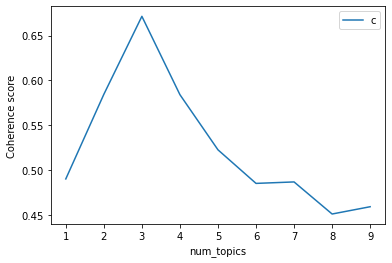

Wall time: 1min 43s


In [52]:
%%time
lmlist_lsi, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df['reviewText'].to_list(), limit=10, model= "lsi")

En esta representacion nos indica que el numero de topics correctos seria 3, vamos a ver que tal saldria, he realizado pruebas con 3 y 4 para intentar ajustar el resultado.

In [53]:
display_topics(lmlist_lsi[2])

Topic 0:
game time games play cards player graphics players fun people 

Topic 1:
album song songs music time quot game phone love track 

Topic 2:
phone album song quot use battery phones songs case quality 



Realiamos una ultima prueba con un modelo Latent Dirichlet Allocation (LdaModel)

In [54]:
ldamodel = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)

In [55]:
display_topics(ldamodel)

Topic 0:
phone baby use time product bottles case battery car quality 

Topic 1:
game fun play cards games time kids players player card 

Topic 2:
game games time graphics story characters system play character way 

Topic 3:
album quot songs music song time love track albums rock 

Topic 4:
water time bottle baby way ship bottles minutes formula wing 



In [56]:
ldamodel.show_topics()

[(0,
  '0.030*"phone" + 0.016*"baby" + 0.014*"use" + 0.013*"time" + 0.012*"product" + 0.010*"bottles" + 0.010*"case" + 0.009*"battery" + 0.009*"car" + 0.008*"quality"'),
 (1,
  '0.080*"game" + 0.018*"fun" + 0.016*"play" + 0.014*"cards" + 0.014*"games" + 0.013*"time" + 0.012*"kids" + 0.012*"players" + 0.011*"player" + 0.010*"card"'),
 (2,
  '0.098*"game" + 0.026*"games" + 0.019*"time" + 0.018*"graphics" + 0.013*"story" + 0.012*"characters" + 0.009*"system" + 0.008*"play" + 0.007*"character" + 0.007*"way"'),
 (3,
  '0.040*"album" + 0.027*"quot" + 0.024*"songs" + 0.022*"music" + 0.022*"song" + 0.015*"time" + 0.011*"love" + 0.011*"track" + 0.010*"albums" + 0.009*"rock"'),
 (4,
  '0.021*"water" + 0.018*"time" + 0.014*"bottle" + 0.007*"baby" + 0.007*"way" + 0.006*"ship" + 0.005*"bottles" + 0.005*"minutes" + 0.005*"formula" + 0.005*"wing"')]

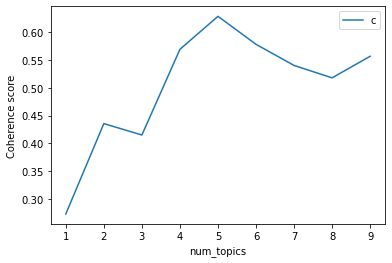

Wall time: 2min 49s


In [60]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df['reviewText'].to_list(), limit=10, model= "lda")

Esto nos indica que localiza 5 topics, he probado realizar las pruebas posteriores con 3 y con 7, pero encontraba los mejores resultados con 5.

Pienso que quizas teniendo ciertos datasets que pueden compartir muchos sustantivos seria mas logico (disculpe si no he entendido bien todo) encontrar menos topics que el numero de datasets ya que algunos datasets comparten mucha informacion (telefonos, viedeojuegos, jueguetes).

En el analisis visual que hemos realizado posteriormente he deciddo dejar el numero en 5.

La intencion de dejar el numero en 5 igual que el numero de datasets ha sido una primera idea que tenia para comparar con la etiquita original que puse en el dataset pero al final no he podido realizarlo.




.



Comparamos la coherencia de los 3 modelos entrenados y comprobamos que el que mejor se ajusta es el ldamodel.

In [61]:
ldamodel = lmlist[4]
lsimodel = lmlist_lsi[2]

lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [62]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df['reviewText'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df['reviewText'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=df['reviewText'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

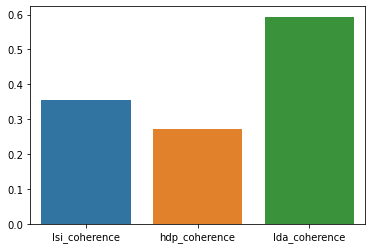

In [63]:
import seaborn as sns

coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)

In [64]:
display_topics(ldamodel)

Topic 0:
album quot songs song music time love albums track rock 

Topic 1:
phone battery charger car case charge time product price device 

Topic 2:
ear quality headset phone volume use sound time noise music 

Topic 3:
game games time fun play graphics story characters cards people 

Topic 4:
baby time bottles son use bottle months water daughter child 



Aqui vemos como nos diferencia bien las clases correspondientes.

Clasificamos ahora todos los documentos en funcion al modelo, asignamos cada documento en funcion al cluster que se corresponde por topic.

In [79]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df['reviewText'].to_list())

In [80]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6683,"game, games, time, fun, play, graphics, story,...","[classic, person, shooter, story, action, pres..."
1,1,0.0,0.7060,"album, quot, songs, song, music, time, love, a...","[sultry, classy, lights, candles, album, secrets]"
2,2,2.0,0.9483,"ear, quality, headset, phone, volume, use, sou...","[model, plantronics, death, model, time, explo..."
3,3,3.0,0.4361,"game, games, time, fun, play, graphics, story,...","[fans, score, lot, pops, bear, man, plenty, me..."
4,4,1.0,0.9001,"phone, battery, charger, car, case, charge, ti...","[thing, work, metal, ways, cell, tower, hills,..."
5,5,0.0,0.7042,"album, quot, songs, song, music, time, love, a...","[mine, day, lyrics, honesty, pop, masterpiece,..."
6,6,1.0,0.4917,"phone, battery, charger, car, case, charge, ti...","[arms, instructions, orientation, pictures]"
7,7,0.0,0.6396,"album, quot, songs, song, music, time, love, a...","[day, head, quot, quot, lydia, lunch, type, tu..."
8,8,4.0,0.9670,"baby, time, bottles, son, use, bottle, months,...","[breast, milk, daughter, course, latch, proble..."
9,9,0.0,0.7906,"album, quot, songs, song, music, time, love, a...","[funkateer, opinion, band, time, drums, bass, ..."


In [81]:
df_dominant_topic.head(60)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6683,"game, games, time, fun, play, graphics, story,...","[classic, person, shooter, story, action, pres..."
1,1,0.0,0.7060,"album, quot, songs, song, music, time, love, a...","[sultry, classy, lights, candles, album, secrets]"
2,2,2.0,0.9483,"ear, quality, headset, phone, volume, use, sou...","[model, plantronics, death, model, time, explo..."
3,3,3.0,0.4361,"game, games, time, fun, play, graphics, story,...","[fans, score, lot, pops, bear, man, plenty, me..."
4,4,1.0,0.9001,"phone, battery, charger, car, case, charge, ti...","[thing, work, metal, ways, cell, tower, hills,..."
5,5,0.0,0.7042,"album, quot, songs, song, music, time, love, a...","[mine, day, lyrics, honesty, pop, masterpiece,..."
6,6,1.0,0.4917,"phone, battery, charger, car, case, charge, ti...","[arms, instructions, orientation, pictures]"
7,7,0.0,0.6396,"album, quot, songs, song, music, time, love, a...","[day, head, quot, quot, lydia, lunch, type, tu..."
8,8,4.0,0.9670,"baby, time, bottles, son, use, bottle, months,...","[breast, milk, daughter, course, latch, proble..."
9,9,0.0,0.7906,"album, quot, songs, song, music, time, love, a...","[funkateer, opinion, band, time, drums, bass, ..."


En estas dos ultimas celdas de arriba ha sido donde he realiado un analisis visual de los topics en lo antes descrito y por eso dedici al final dejar 5 topics.
Cuando realizaba el analisis con muy pocos registros comence de 200 se veian muy pocas cosas claras, una vez que se añadian mas registros quedaban claro los cluster.

In [82]:
#df_baby
#df_music
#df_phones
#df_toys
#df_games

Ponemos una etiqueta a cada topic identificado.

En una version anterior y que me habia complicado bastante, queria identificar mas topics y comparar con la etiqueta original.
El mejor resultado que me ha dado el modelo y luego no tenia mucho sentido cruzar etiquetas ha sido solamente con sustantivos ya que se identificaban bien los cluster.

In [83]:
label_dicc = {0:'music', 1:'phones', 2:'toys', 3: 'games', 4:'babys'}

In [84]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int64')

In [85]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].map(label_dicc)
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,games,0.6683,"game, games, time, fun, play, graphics, story,...","[classic, person, shooter, story, action, pres..."
1,1,music,0.7060,"album, quot, songs, song, music, time, love, a...","[sultry, classy, lights, candles, album, secrets]"
2,2,toys,0.9483,"ear, quality, headset, phone, volume, use, sou...","[model, plantronics, death, model, time, explo..."
3,3,games,0.4361,"game, games, time, fun, play, graphics, story,...","[fans, score, lot, pops, bear, man, plenty, me..."
4,4,phones,0.9001,"phone, battery, charger, car, case, charge, ti...","[thing, work, metal, ways, cell, tower, hills,..."
5,5,music,0.7042,"album, quot, songs, song, music, time, love, a...","[mine, day, lyrics, honesty, pop, masterpiece,..."
6,6,phones,0.4917,"phone, battery, charger, car, case, charge, ti...","[arms, instructions, orientation, pictures]"
7,7,music,0.6396,"album, quot, songs, song, music, time, love, a...","[day, head, quot, quot, lydia, lunch, type, tu..."
8,8,babys,0.9670,"baby, time, bottles, son, use, bottle, months,...","[breast, milk, daughter, course, latch, proble..."
9,9,music,0.7906,"album, quot, songs, song, music, time, love, a...","[funkateer, opinion, band, time, drums, bass, ..."


In [86]:
df['labels'] = df_dominant_topic['Dominant_Topic']

Examinamos algunos de los registros y los textos originales para ver la comparacion con los topics.

In [87]:
df[['text2', 'labels']].head(10)

,text2,labels
0,"A modern classic, this is an finely-honed firs...",games
1,I have loved and listened to this CD since I w...,music
2,I bought this bluetooth after using another mo...,toys
3,"For fans, another score, one of his best, prob...",games
4,This thing is really great! I work in a metal...,phones
5,This CD has been a favorite of mine from the f...,music
6,The sticky dash mount broke as I tried to remo...,phones
7,"So one day im over at Enrique's, a haunt me bi...",music
8,"I didn't plan on having to pump breast milk, m...",babys
9,OK. Here's the deal. Mandrill are (in one humb...,music


In [88]:
df[ df['labels'] == 'games'].head().text2

0     A modern classic, this is an finely-honed firs...
3     For fans, another score, one of his best, prob...
15    I love collecting these items, they are so rea...
17    I had read all of the bad reviews for Messiah,...
31    Still going strong after all these years. Goof...
Name: text2, dtype: object

# Distribucion de los topics

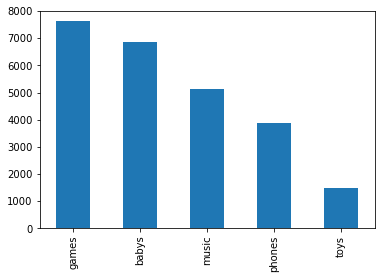

In [89]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()

Comprobamos que el reparto es balanceado salvo en el topic "toys" que me imagino ha identificado muchos sustantivos en "games" o en "babys" tambien.

# Representacion grafica

In [90]:
pyLDAvis.enable_notebook()
vis_newsgroup = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis_newsgroup

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.088191 -0.221096       1        1  35.637081
0     -0.233184  0.091899       2        1  24.063736
4      0.026873  0.083712       3        1  19.259550
1      0.187983 -0.063392       4        1  13.154202
2      0.106519  0.108877       5        1   7.885433, topic_info=      Term          Freq         Total Category  logprob  loglift
22    game  24099.000000  24099.000000  Default  30.0000  30.0000
57   album   6935.000000   6935.000000  Default  29.0000  29.0000
356  phone   5221.000000   5221.000000  Default  28.0000  28.0000
210  songs   4158.000000   4158.000000  Default  27.0000  27.0000
130   baby   2835.000000   2835.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
322  price    277.923798   1848.584473   Topic5  -5.2114   0.6453
93   thing    295.537109   2922.751221   Topic5  -5.1499   0.2487
571    bit    238.051208   1999.474854   Topic5  -5.3662   0.4120
54     way    250.960983   3911.986572   Topic5  -5.3134  -0.2063
114    car    221.253876   1710.958374   Topic5  -5.4394   0.4947

[391 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
6172      2  0.992962           abba
2073      2  0.978110  accompaniment
2073      3  0.014820  accompaniment
0         1  0.950016         action
0         2  0.008482         action
...     ...       ...            ...
56        3  0.160392          years
56        4  0.079864          years
56        5  0.062301          years
5951      1  0.014457         zombie
5951      4  0.983070         zombie

[1030 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 3])

In [91]:
pyLDAvis.save_html(vis_newsgroup, '../results/topics_practica_00.html')

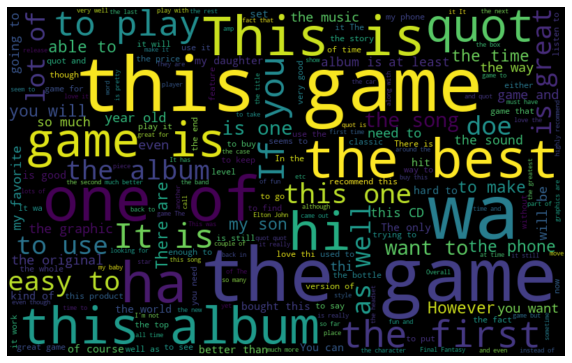

In [100]:
#Visualization
#Word Cloud
all_words = ' '.join([text for text in df['text2']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

No he conseguido como era una de mis primeras intenciones representar cada topic en un grafico independiente como el de arriba.

Bibliografia

He realizado este ejercicio en base a las clases y notebooks vistos en el modulo y tambien he visitado la siguiente documentacion adicional tanto para utilizar codigo, ver explicacion de parametros o modelos.

https://medium.com/@armandj.olivares/topic-modeling-on-spanish-text-f7a5e998fb90

https://stackoverrun.com/es/q/8900958

https://towardsdatascience.com/how-to-use-nlp-in-python-a-practical-step-by-step-example-bd82ca2d2e1e

https://github.com/ArmandDS/topic_modeling/blob/master/topic_modeling_spanish.ipynb

https://radimrehurek.com/gensim/models/lsimodel.html

https://realpython.com/tutorials/data-science/

https://stackoverflow.com/questions/47557563/lemmatization-of-all-pandas-cells